多層のdeepencoderを試みる。

In [1]:
from __future__ import print_function

import keras
from keras.datasets import mnist
from keras.models import Sequential
from keras.layers import Dense, Dropout
from keras.optimizers import RMSprop

Using TensorFlow backend.


In [2]:
import numpy as np

In [3]:
batch_size = 128
epochs = 300

# the data, shuffled and split between train and test sets
(x_train, y_train), (x_test, y_test) = mnist.load_data()
x_train = x_train.astype('float32')
x_test = x_test.astype('float32')
x_train /= 255
x_test /= 255

In [4]:
keep_train_idx = np.logical_or(y_train == 4, y_train == 9)
keep_test_idx = np.logical_or(y_test ==4, y_test == 9)

x_train = x_train[keep_train_idx]
x_test = x_test[keep_test_idx]

In [5]:
x_train_vec = x_train.reshape(x_train.shape[0], 784)
x_test_vec = x_test.reshape(x_test.shape[0], 784)

中央の要素数は先ほどと同じ12個に設定する。層間の比をだいたい同じにすると良い。

In [6]:
model = Sequential()
model.add(Dense(100, activation='sigmoid', input_shape=(784,)))
model.add(Dropout(0.3))
model.add(Dense(12, activation='sigmoid'))
model.add(Dropout(0.3))
model.add(Dense(100, activation='sigmoid'))
model.add(Dropout(0.3))
model.add(Dense(784, activation='sigmoid'))
model.summary()

_________________________________________________________________
Layer (type)                 Output Shape              Param #   
dense_1 (Dense)              (None, 100)               78500     
_________________________________________________________________
dropout_1 (Dropout)          (None, 100)               0         
_________________________________________________________________
dense_2 (Dense)              (None, 12)                1212      
_________________________________________________________________
dropout_2 (Dropout)          (None, 12)                0         
_________________________________________________________________
dense_3 (Dense)              (None, 100)               1300      
_________________________________________________________________
dropout_3 (Dropout)          (None, 100)               0         
_________________________________________________________________
dense_4 (Dense)              (None, 784)               79184     
Total para

In [7]:
model.compile(loss='mean_squared_error',
              optimizer=RMSprop(),
              metrics=['accuracy'])

history = model.fit(x_train_vec, x_train_vec,
                    batch_size=batch_size,
                    epochs=epochs,
                    verbose=1,
                    validation_data=(x_test_vec, x_test_vec))
score = model.evaluate(x_test_vec, x_test_vec, verbose=0)
print('Test loss:', score[0])
print('Test accuracy:', score[1])

Train on 11791 samples, validate on 1991 samples
Epoch 1/300
11791/11791 [==============================] - 1s - loss: 0.0747 - acc: 0.0066 - val_loss: 0.0524 - val_acc: 0.0095
Epoch 2/300
11791/11791 [==============================] - 1s - loss: 0.0531 - acc: 0.0081 - val_loss: 0.0517 - val_acc: 0.0095
Epoch 3/300
11791/11791 [==============================] - 1s - loss: 0.0515 - acc: 0.0072 - val_loss: 0.0489 - val_acc: 0.0080
Epoch 4/300
11791/11791 [==============================] - 1s - loss: 0.0483 - acc: 0.0093 - val_loss: 0.0460 - val_acc: 0.0105
Epoch 5/300
11791/11791 [==============================] - 0s - loss: 0.0467 - acc: 0.0107 - val_loss: 0.0444 - val_acc: 0.0065
Epoch 6/300
11791/11791 [==============================] - 1s - loss: 0.0452 - acc: 0.0109 - val_loss: 0.0423 - val_acc: 0.0080
Epoch 7/300
11791/11791 [==============================] - 1s - loss: 0.0437 - acc: 0.0093 - val_loss: 0.0408 - val_acc: 0.0070
Epoch 8/300
11791/11791 [==============================

11791/11791 [==============================] - 1s - loss: 0.0345 - acc: 0.0094 - val_loss: 0.0291 - val_acc: 0.0085
Epoch 128/300
11791/11791 [==============================] - 0s - loss: 0.0346 - acc: 0.0090 - val_loss: 0.0292 - val_acc: 0.0085
Epoch 129/300
11791/11791 [==============================] - 0s - loss: 0.0343 - acc: 0.0110 - val_loss: 0.0291 - val_acc: 0.0116
Epoch 130/300
11791/11791 [==============================] - 0s - loss: 0.0343 - acc: 0.0095 - val_loss: 0.0291 - val_acc: 0.0095
Epoch 131/300
11791/11791 [==============================] - 1s - loss: 0.0344 - acc: 0.0098 - val_loss: 0.0291 - val_acc: 0.0100
Epoch 132/300
11791/11791 [==============================] - 0s - loss: 0.0344 - acc: 0.0105 - val_loss: 0.0291 - val_acc: 0.0121
Epoch 133/300
11791/11791 [==============================] - 0s - loss: 0.0344 - acc: 0.0099 - val_loss: 0.0290 - val_acc: 0.0105
Epoch 134/300
11791/11791 [==============================] - 1s - loss: 0.0343 - acc: 0.0096 - val_loss:

11791/11791 [==============================] - 1s - loss: 0.0327 - acc: 0.0094 - val_loss: 0.0264 - val_acc: 0.0090
Epoch 254/300
11791/11791 [==============================] - 1s - loss: 0.0327 - acc: 0.0109 - val_loss: 0.0264 - val_acc: 0.0090
Epoch 255/300
11791/11791 [==============================] - 0s - loss: 0.0326 - acc: 0.0102 - val_loss: 0.0263 - val_acc: 0.0090
Epoch 256/300
11791/11791 [==============================] - 0s - loss: 0.0327 - acc: 0.0103 - val_loss: 0.0264 - val_acc: 0.0080
Epoch 257/300
11791/11791 [==============================] - 1s - loss: 0.0326 - acc: 0.0107 - val_loss: 0.0264 - val_acc: 0.0090
Epoch 258/300
11791/11791 [==============================] - 0s - loss: 0.0326 - acc: 0.0109 - val_loss: 0.0264 - val_acc: 0.0080
Epoch 259/300
11791/11791 [==============================] - 1s - loss: 0.0326 - acc: 0.0112 - val_loss: 0.0263 - val_acc: 0.0095
Epoch 260/300
11791/11791 [==============================] - 1s - loss: 0.0326 - acc: 0.0092 - val_loss:

エポック数は先ほどより長くしたこともあり少々待ち時間がかかる。

## Testing results 

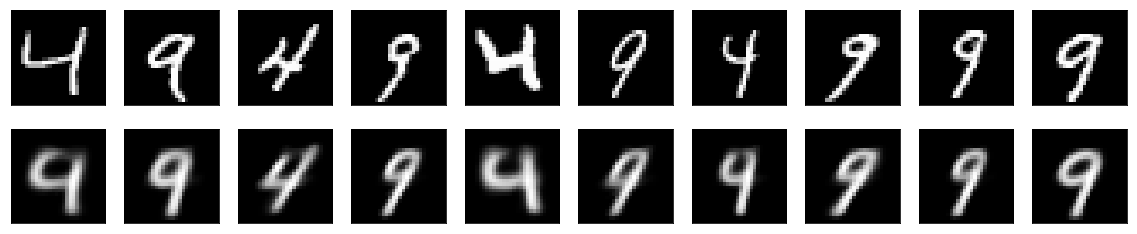

In [8]:
import matplotlib.pyplot as plt
%matplotlib inline

n = 10  # how many digits we will display

plt.figure(figsize=(20, 4))
for i in range(n):
    # display original
    ax = plt.subplot(2, n, i + 1)
    plt.imshow(x_train[i].reshape(28, 28))
    plt.gray()
    ax.get_xaxis().set_visible(False)
    ax.get_yaxis().set_visible(False)

    # display reconstruction
    ax = plt.subplot(2, n, i + 1 + n)
    predicted = model.predict(x_train_vec[i:i+1]).reshape((28,28))
    plt.imshow(predicted)
    plt.gray()
    ax.get_xaxis().set_visible(False)
    ax.get_yaxis().set_visible(False)
plt.show()

一部はっきりしないweakな４もあるが、単層のときと比べて、かなり４と９の区別がつきやすくなった。

自己符号化器はPCAと関係があるが、PCAは線形な分離しかできない。最近は非線形な<a href="http://cs.stanford.edu/people/karpathy/tsnejs/">tSNE</a>が注目されている。